# Estimating a mystery function

We have calculated computational estimates of various quantities. A common property, however, of these was that we had a theoretical value. Let's try doing an estimate where we have no such reference!

A "mystery function" is available as an API, where you can fetch values from. You will need the "requests" library for the following, which you can install by running "pip install requests" in a jupyter notebook. Once that is installed, you can use the following function to fetch values -- in fact, to make to make your job easier, you can ask for a large number of values all at once, instead of one-by-one. The function get_data(n) will return $n$ values:

In [1]:
import requests

def get_data(n):
    return requests.get('http://165.22.204.220:8000/', params={'n':n}).json()

An example:

In [2]:
values = get_data(6)
print(values)

[1.5747632223606653, 4.690211242760726, 3.344320363818417, 1.6870337763795493, 11.444610791634473, 1.431513865304293]


Your task is to estimate the expected value of this mystery function, i.e. the average of the values that are returned by get_data().

(Note: the $n$ parameter is just to specify how many values you want to generate, it doesn't change the average.)

In [3]:
import matplotlib.pyplot as plt

In [4]:
from statistics import mean 
from statistics import variance

In [5]:
import numpy as np

In [6]:
samples = get_data(100000)

In [7]:
print(mean(samples))
print(variance(samples))

80.11086378067304
37901352.32896475


Clearly, the mystery function has a high variance based on what we see here.

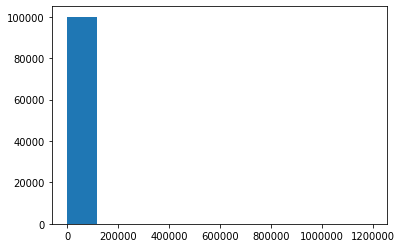

In [8]:
%matplotlib inline
_ = plt.hist(samples)

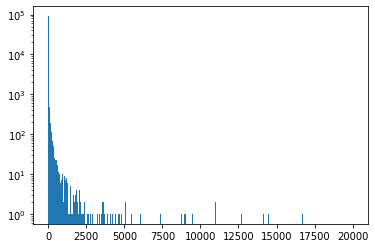

In [9]:
_ = plt.hist(samples, log = True, bins = 1000, range = (0,20000))

It seems to me that we are dealing with a very skewed distribution (as expected from the high variance) with a very long tail. I will try to look at the distribution of the sample mean to try to reduce the variance we seeing here.

In [10]:
samples_2 = get_data(800000)

In [11]:
mean_samples = [mean(samples_2[i:i+10000]) for i in range(0, 800000, 10000)]

In [12]:
expected_value_sample_mean = mean(mean_samples)

In [13]:
expected_value_sample_mean

127.15518741625529

In [14]:
variance_sample_mean = variance(mean_samples)
variance_sample_mean

156583.21528660983

This is probably not a bad estimation since the distribution of sample means have the same expected value as the original distrbution but with less variance.

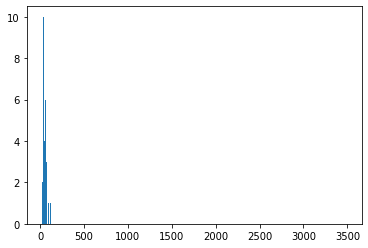

In [15]:
_ = plt.hist(mean_samples, bins = 1000)

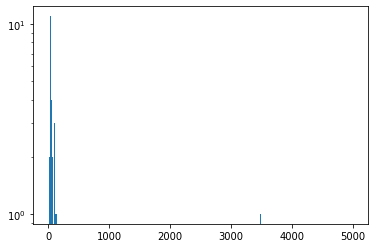

In [16]:
_ = plt.hist(mean_samples, log = True, bins = 1000, range = (0, 5000))

The sample mean distribution is still very skewed as we can see here.

My next attempt is to try to use machine learning to estimate a density function for the sample data. 
Source cited: https://machinelearningmastery.com/probability-density-estimation/

In [17]:
samples_3 = get_data(800000)

In [18]:
from sklearn.neighbors import KernelDensity

In [19]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import LeaveOneOut

I could not figure out how to cross-validate between models to estimate the best bandwidth to use here unfortunately.

In [20]:
x = np.asarray(samples_3)
kde = KernelDensity(bandwidth=1.0, kernel='exponential')
kde.fit(x[:, None])

KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
              kernel='exponential', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

In [21]:
values = np.linspace(np.min(x), np.max(x), 1000)
values = values.reshape((len(values), 1))
probabilities = kde.score_samples(values)
probabilities = np.exp(probabilities)

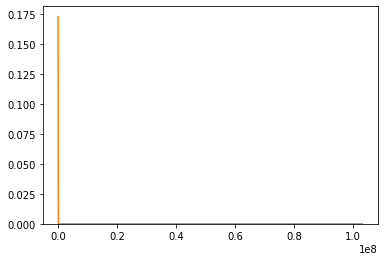

In [22]:
%matplotlib inline
plt.hist(x, bins=1000, density=True)
plt.plot(values[:], probabilities)

In [23]:
expected_value_samples_3 = 0
for i in range (0, 1000):
    expected_value_samples_3 += values[i][0] * probabilities[i]

In [24]:
expected_value_samples_3

64.61087415072925